In [ ]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from scipy import stats 
import statsmodels.api as smf
import warnings 
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [ ]:
tc=pd.read_csv('ToyotaCorolla.csv',encoding='unicode_escape')
tc

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1431,1438,TOYOTA Corolla 1.3 16V HATCHB G6 2/3-Doors,7500,69,12,1998,20544,Petrol,86,1,...,1,1,1,0,1,1,1,0,0,0
1432,1439,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,10845,72,9,1998,19000,Petrol,86,0,...,0,0,1,0,0,1,1,0,0,0
1433,1440,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,8500,71,10,1998,17016,Petrol,86,0,...,0,0,1,0,0,0,1,0,0,0
1434,1441,TOYOTA Corolla 1.3 16V HATCHB LINEA TERRA 2/3-...,7250,70,11,1998,16916,Petrol,86,1,...,0,0,0,0,0,0,1,0,0,0


Basic and EDA

In [ ]:
tc.shape

(1436, 38)

In [ ]:
tc.rename(columns={'Price':'price','Age_08_04':'age','KM':'km','HP':'hp','Doors':'doors','Gears':'gears','Quarterly_Tax':'qtr_tax','Weight':'weight'},inplace=True)
tc_1=tc[["price","age","km","hp","cc","doors","gears","qtr_tax","weight"]]
tc_1

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
tc_1.duplicated().value_counts()

False    1435
True        1
dtype: int64

In [ ]:
tc_1[tc_1.duplicated()]

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
113,24950,8,13253,116,2000,5,5,234,1320


In [ ]:
tc_1.drop_duplicates(inplace=True)
tc_1.reset_index()
tc_1.shape

(1435, 9)

In [ ]:
tc_1.duplicated().value_counts()

False    1435
dtype: int64

In [ ]:
tc_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   price    1435 non-null   int64
 1   age      1435 non-null   int64
 2   km       1435 non-null   int64
 3   hp       1435 non-null   int64
 4   cc       1435 non-null   int64
 5   doors    1435 non-null   int64
 6   gears    1435 non-null   int64
 7   qtr_tax  1435 non-null   int64
 8   weight   1435 non-null   int64
dtypes: int64(9)
memory usage: 112.1 KB


In [ ]:
tc_1.describe()

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
count,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000,1435.000000
mean,10720.915679,55.980488,68571.782578,101.491986,1576.560976,4.032753,5.026481,87.020209,1072.287108
std,3608.732978,18.563312,37491.094553,14.981408,424.387533,0.952667,0.188575,40.959588,52.251882
min,4350.000000,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,9900.000000,61.000000,63451.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1070.000000
75%,11950.000000,70.000000,87041.500000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,32500.000000,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [ ]:
for i, column in enumerate(tc_1.columns, 1):
   print(tc_1[column].value_counts())


8950     109
9950      84
7950      63
10950     62
11950     47
        ... 
11790      1
4750       1
4350       1
21125      1
10845      1
Name: price, Length: 236, dtype: int64
68    69
65    63
80    59
78    47
62    42
      ..
2      2
1      2
10     1
18     1
6      1
Name: age, Length: 77, dtype: int64
36000    9
1        8
59000    7
43000    7
45000    6
        ..
63792    1
64193    1
65170    1
65471    1
16916    1
Name: km, Length: 1263, dtype: int64
110    835
86     249
97     164
72      73
90      36
69      34
107     21
192     11
116      8
98       2
71       1
73       1
Name: hp, dtype: int64
1600     845
1300     248
1400     164
2000     118
1900      30
1800      14
1598       4
1587       4
1995       2
1398       2
1332       2
16000      1
1975       1
Name: cc, dtype: int64
5    673
3    622
4    138
2      2
Name: doors, dtype: int64
5    1389
6      43
3       2
4       1
Name: gears, dtype: int64
85     613
69     559
185     96
19      72
100   

In [ ]:
tc_1.head(5)

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


Visualising datapoints

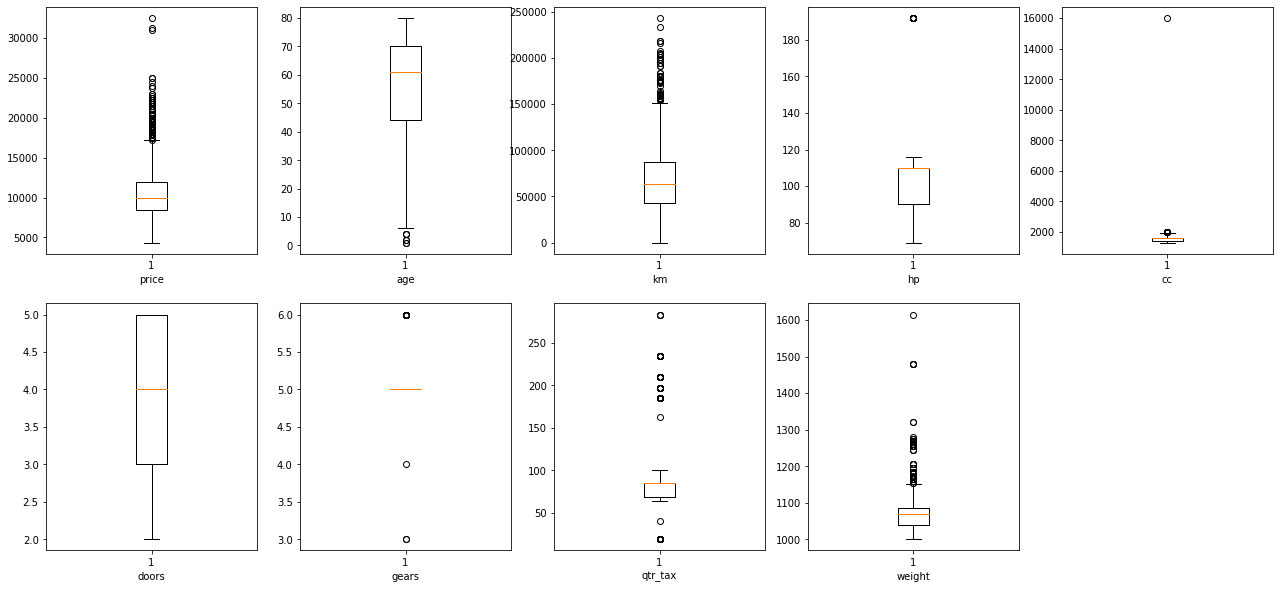

In [ ]:
#plotting distplot to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(tc_1.columns, 1):
    plt.subplot(2,5,i)
    plt.boxplot(tc_1[column])
    plt.xlabel(tc_1[column].name)

There are outliers in almost all features

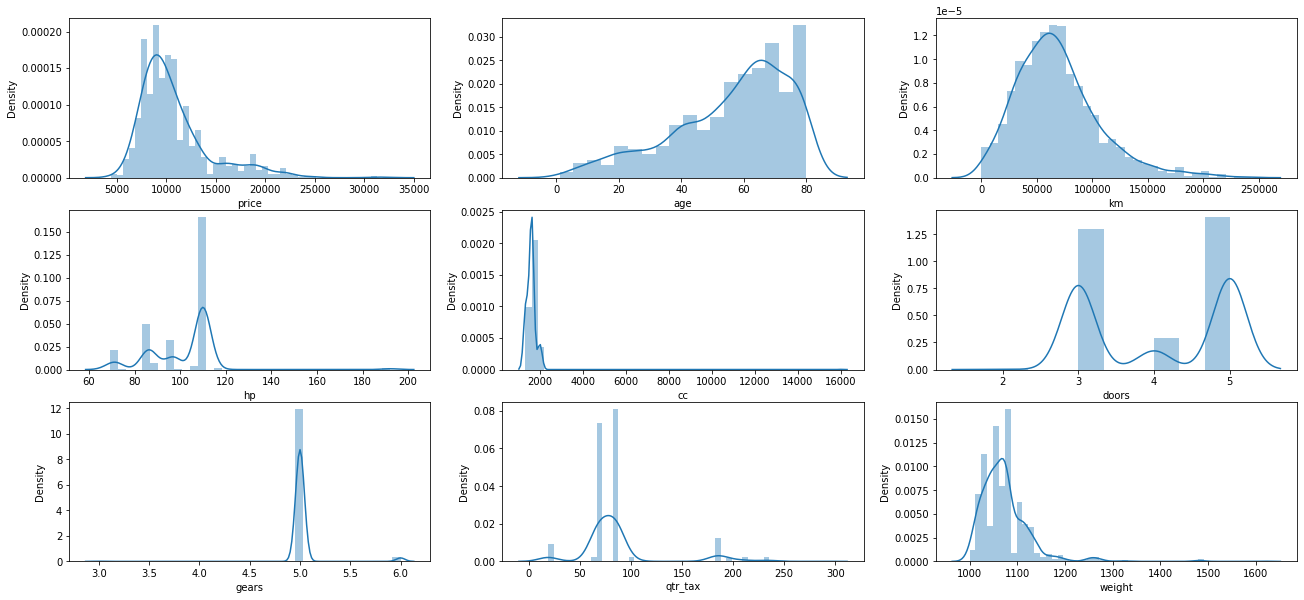

In [ ]:
#plotting distplot to observe datapoints nature
plt.figure(figsize=(22,10))
for i, column in enumerate(tc_1.columns, 1):
    plt.subplot(3,3,i)
    sns.distplot(tc_1[column])

All are tailed distribution

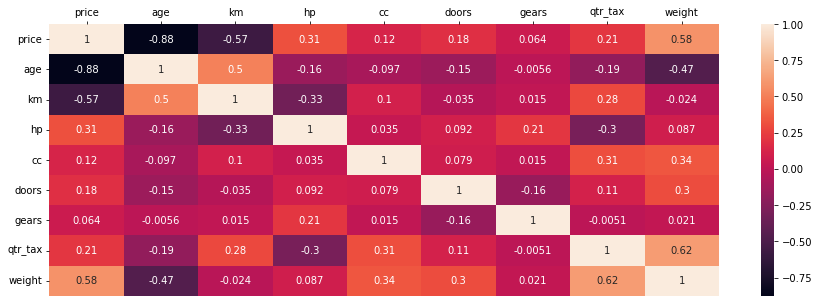

In [ ]:
#plotting the heatmap for correlation 
plt.figure(figsize=(15,5))
ax = sns.heatmap(tc_1.corr(),annot=True)
ax.xaxis.tick_top()

Price has more correlation with age,weight,km than rest features

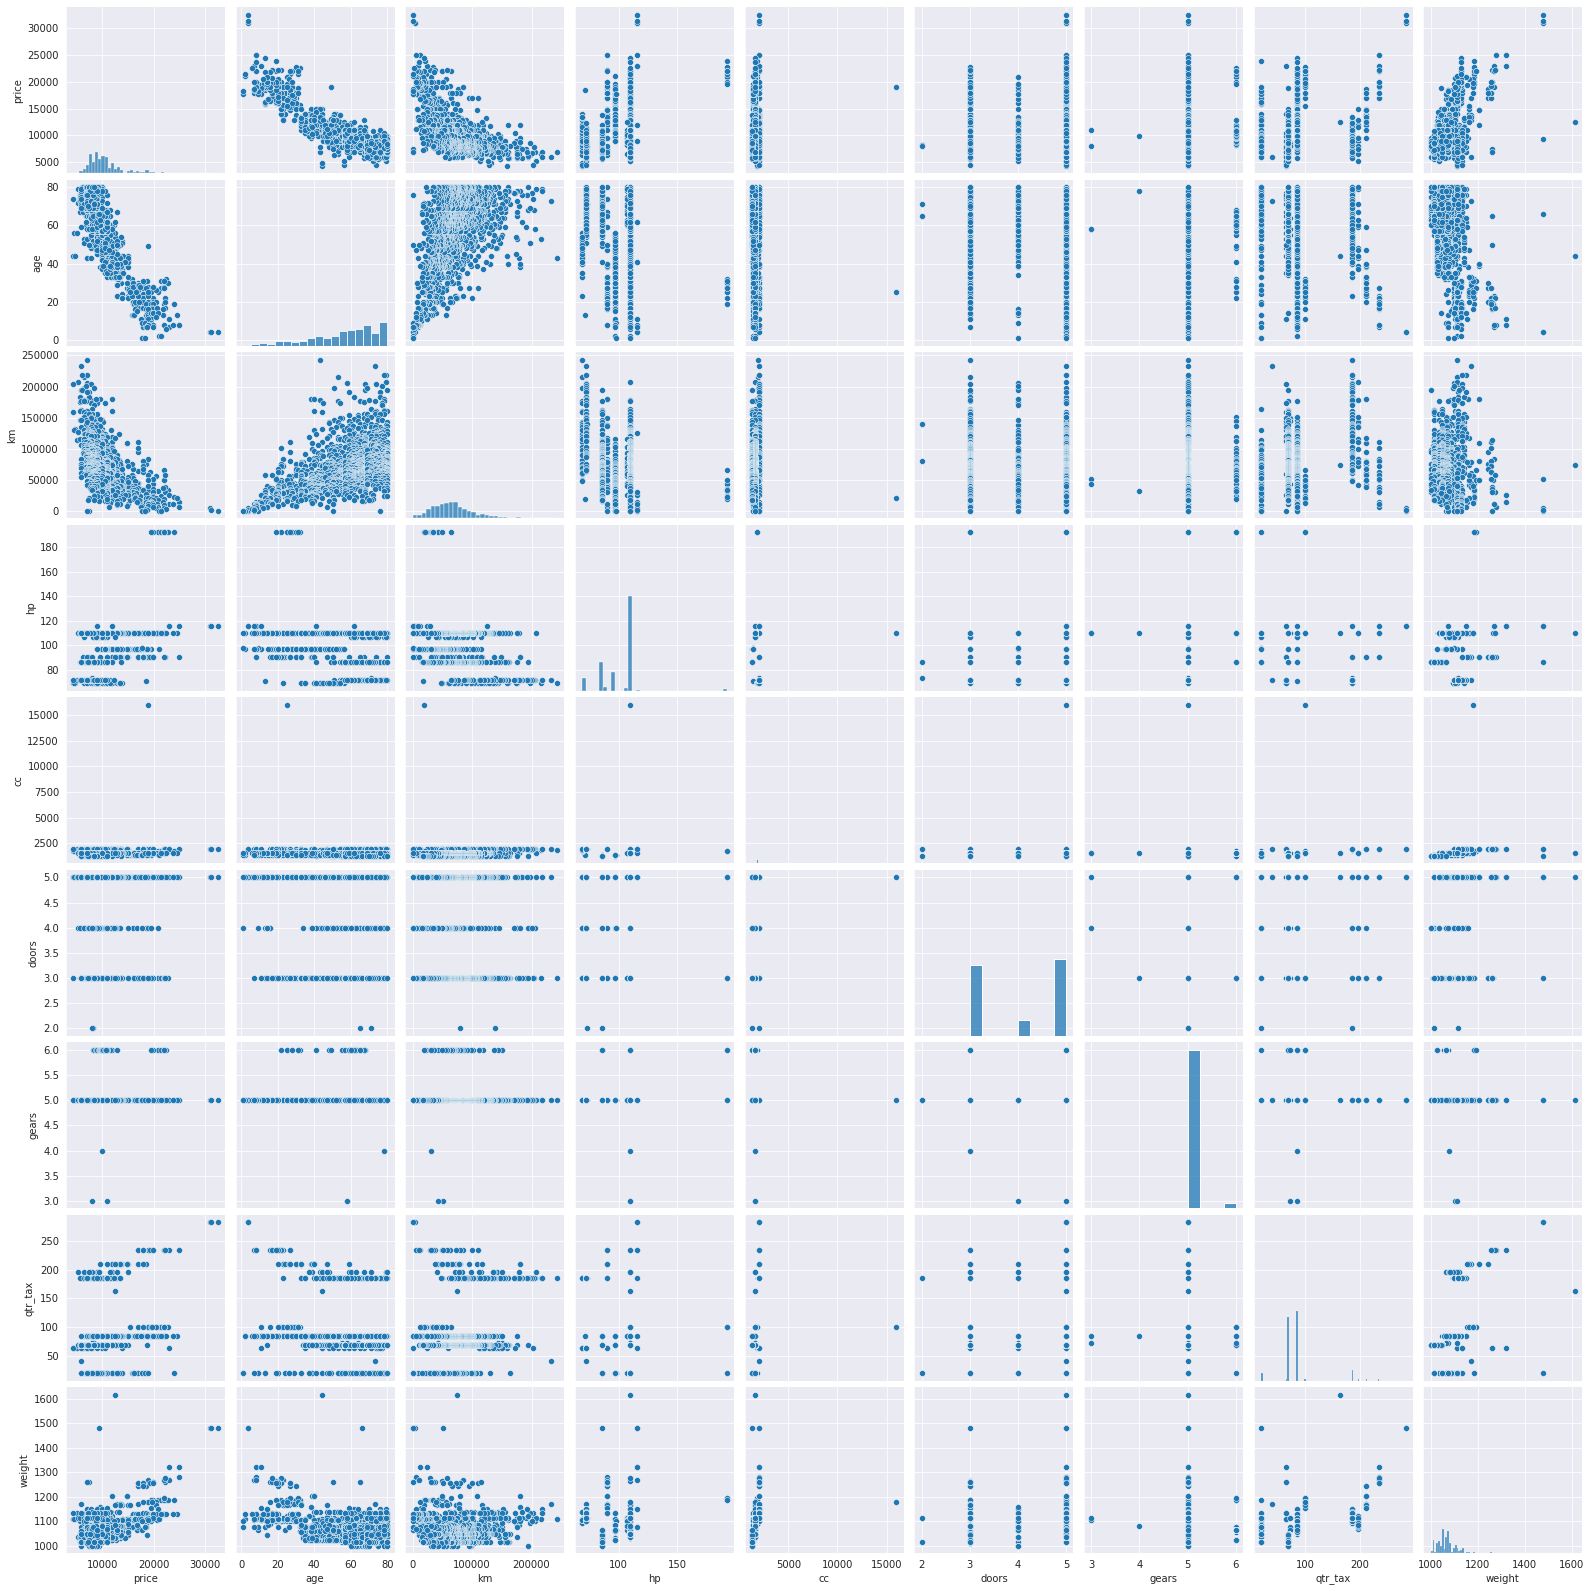

In [ ]:
#pairplot
sns.set_style(style='darkgrid')
sns.pairplot(tc_1)

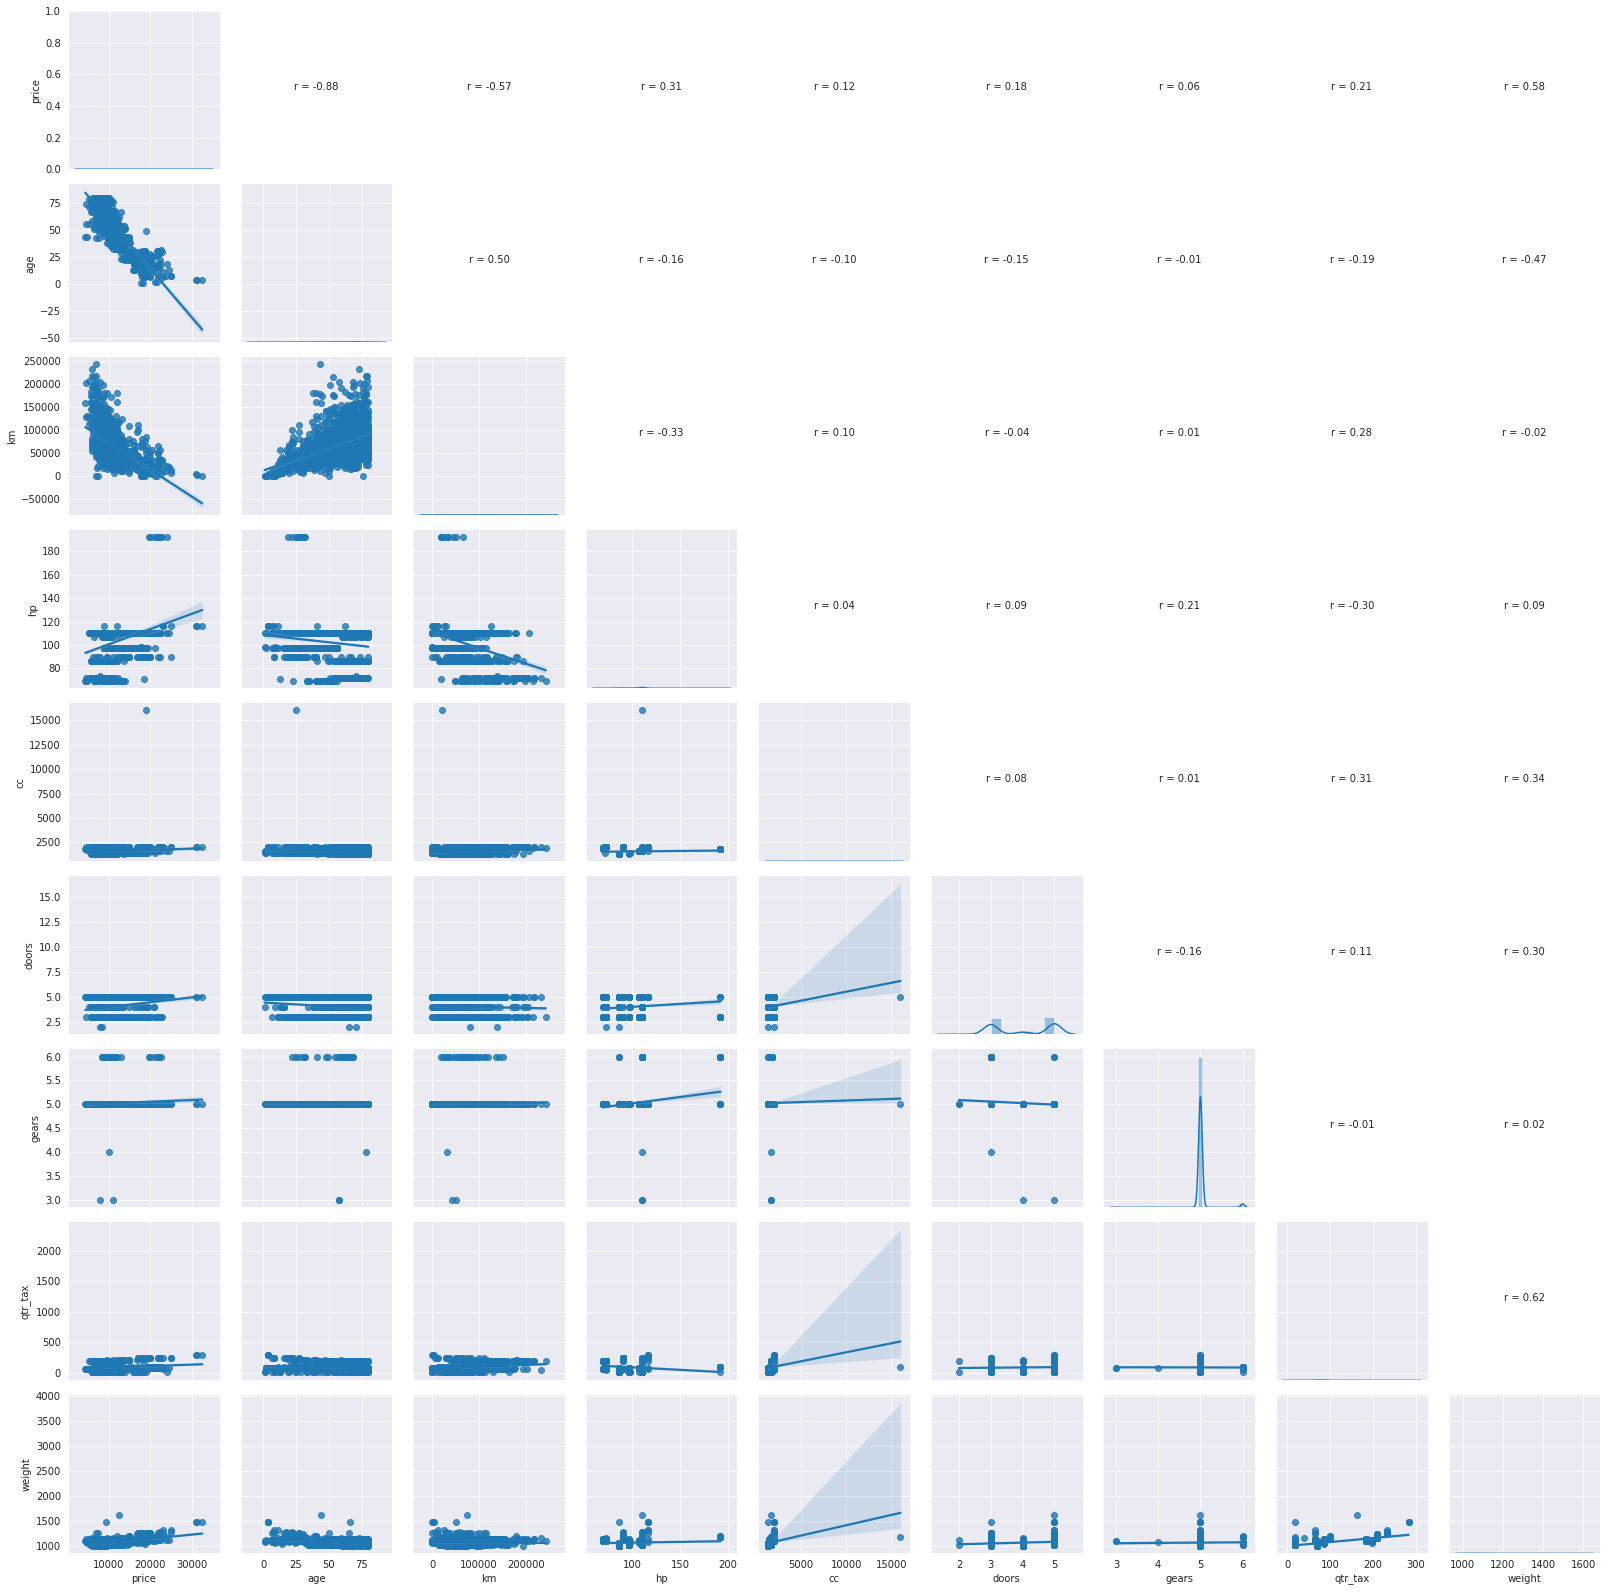

In [ ]:
#create pairgrid with correlation coefficent
from scipy.stats import pearsonr
def reg_coef(x,y,label=None,color=None,**kwargs):
  ax = plt.gca()
  r,p = pearsonr(x,y)
  ax.annotate('r = {:.2f}'.format(r), xy=(0.5,0.5), xycoords='axes fraction', ha='center')
  ax.set_axis_off()


g = sns.PairGrid(tc_1)
g.map_diag(sns.distplot)
g.map_lower(sns.regplot)
g.map_upper(reg_coef)    

Modelling

In [ ]:
import statsmodels.formula.api as smf 
model= smf.ols('price~age+km+hp+cc+doors+gears+qtr_tax+weight',data=tc_1).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:22:57   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
km            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
hp            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
gears        597.7159    196.969      3.035      0.002     211.335     984.097
qtr_tax        3.8588      1.311      2.944      0.003       1.288       6.430
weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

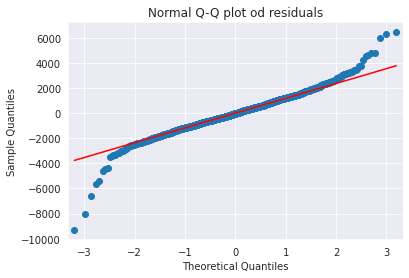

In [ ]:
import statsmodels.api as sm
qqplot1=sm.qqplot(model.resid,line='q')
plt.title('Normal Q-Q plot od residuals')
plt.show()

Text(0, 0.5, 'Standardized Residual Values')

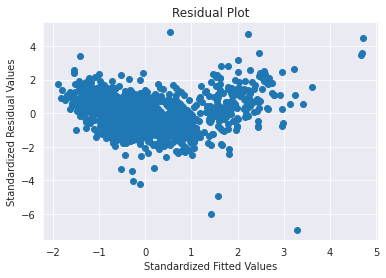

In [ ]:
def get_standardized_values( vals ):
  return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(model.fittedvalues),get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')

eval_env: 1


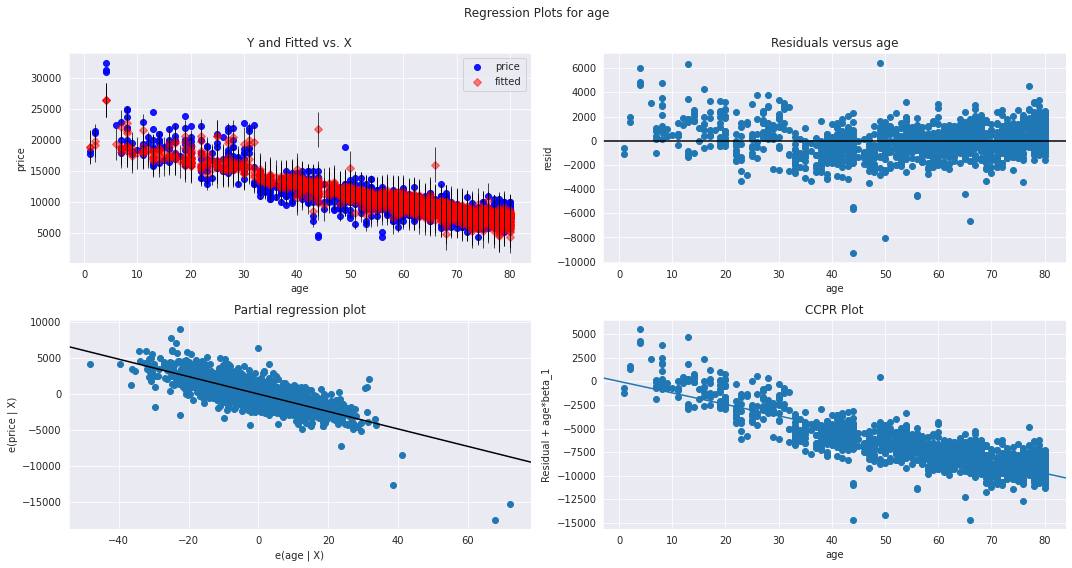

In [ ]:
import statsmodels.api as sm
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "age", fig=fig)
plt.show()

eval_env: 1


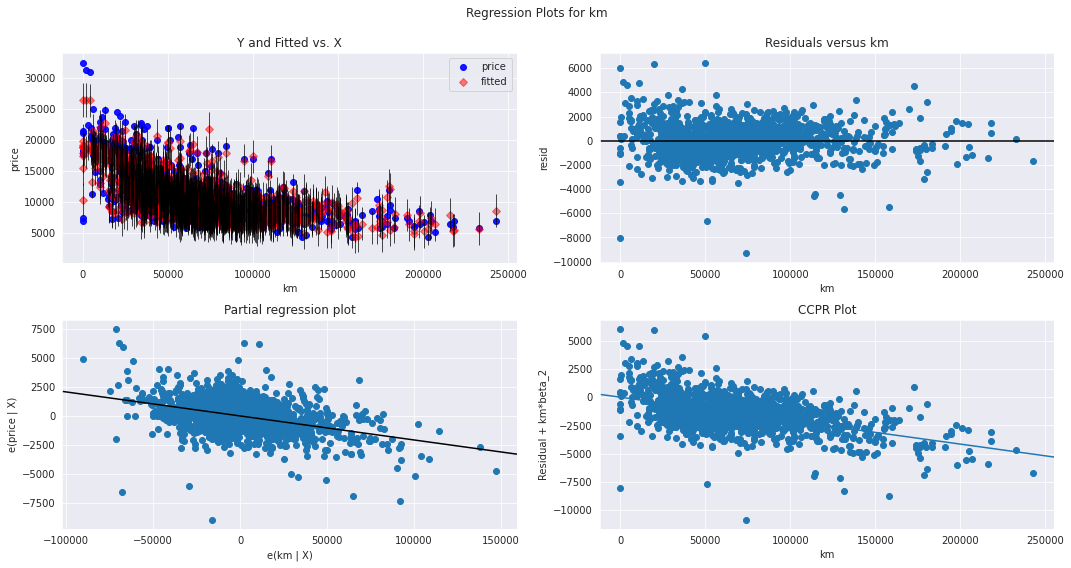

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "km", fig=fig)
plt.show()

eval_env: 1


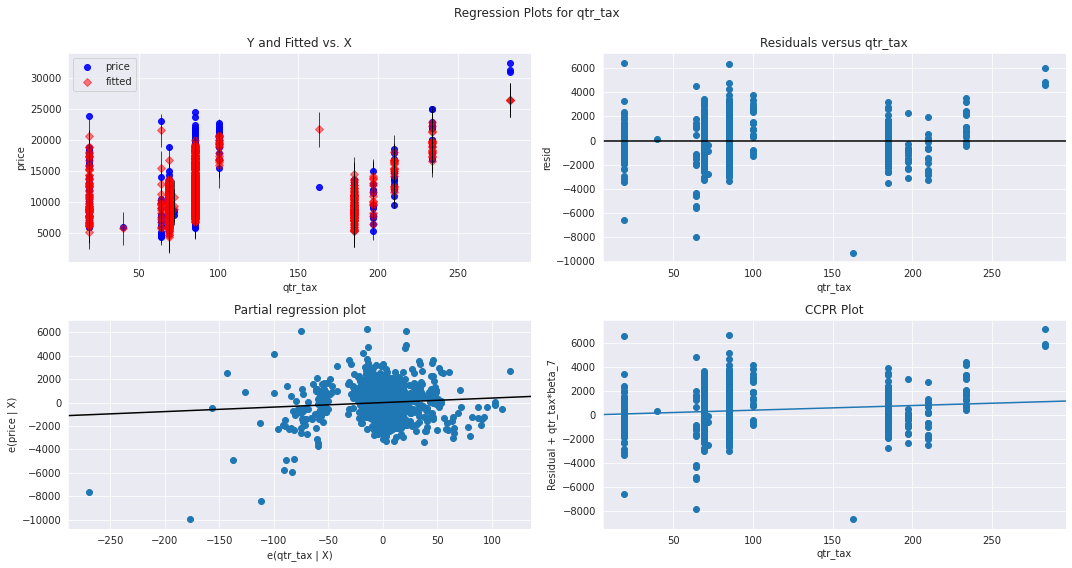

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "qtr_tax", fig=fig)
plt.show()

eval_env: 1


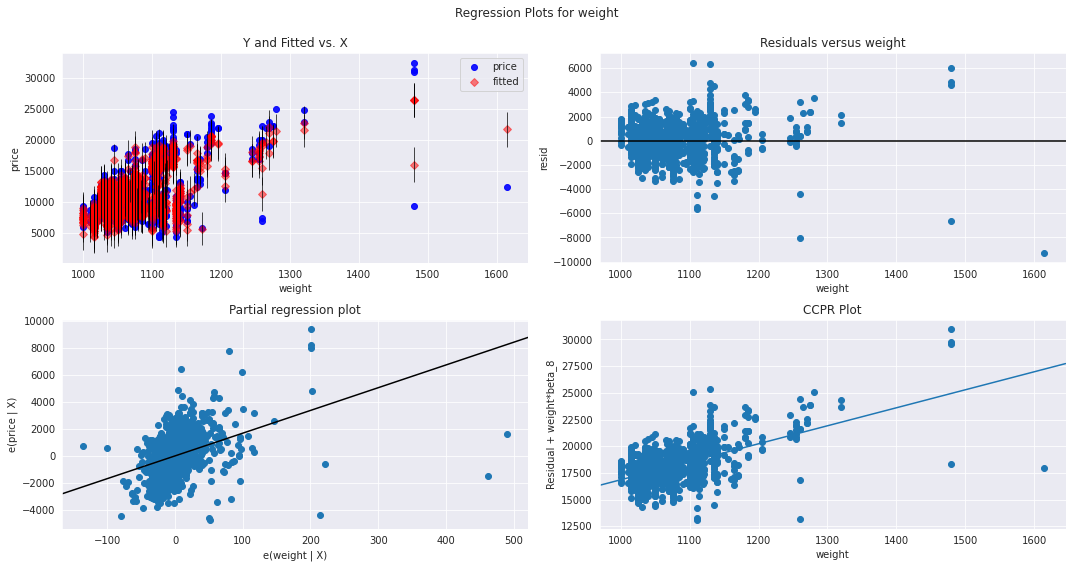

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "weight", fig=fig)
plt.show()

Linear Regression Model

In [ ]:
import statsmodels.formula.api as smf
tc_1_model2 = smf.ols('price~age',data=tc_1).fit()
tc_1_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.768
Method:                 Least Squares   F-statistic:                     4740.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:23:04   Log-Likelihood:                -12742.
No. Observations:                1435   AIC:                         2.549e+04
Df Residuals:                    1433   BIC:                         2.550e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.026e+04    145.926    138.818      0.000       2e+04    2.05e+04
age         -170.3487      2.474    -68.847      0.000    -175.202    -165.495
==============================================================================
Omnibus:                      363.006   Durbin-Watson:                   1.223
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2878.814
Skew:                           0.951   Prob(JB):                         0.00
Kurtosis:                       9.673   Cond. No.                         187.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

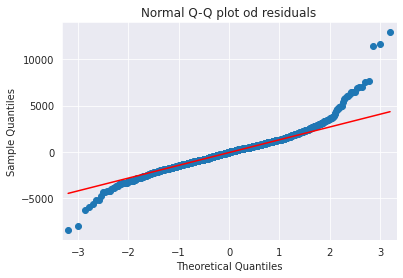

In [ ]:
import statsmodels.api as sm
qqplot1=sm.qqplot(tc_1_model2.resid,line='q')
plt.title('Normal Q-Q plot od residuals')
plt.show()

Text(0, 0.5, 'Standardized Residual Values')

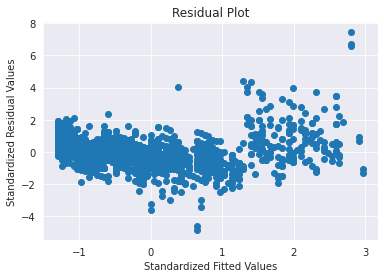

In [ ]:
def get_standardized_values( vals ):
  return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(tc_1_model2.fittedvalues),get_standardized_values(tc_1_model2.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted Values')
plt.ylabel('Standardized Residual Values')

In [ ]:
import statsmodels.formula.api as smf
tc_1_model3 = smf.ols('price~km',data=tc_1).fit()
tc_1_model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.324
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     687.6
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          4.12e-124
Time:                        05:23:05   Log-Likelihood:                -13509.
No. Observations:                1435   AIC:                         2.702e+04
Df Residuals:                    1433   BIC:                         2.703e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.448e+04    163.344     88.643      0.000    1.42e+04    1.48e+04
km            -0.0548      0.002    -26.222      0.000      -0.059      -0.051
==============================================================================
Omnibus:                      390.246   Durbin-Watson:                   0.389
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1119.937
Skew:                           1.385   Prob(JB):                    6.44e-244
Kurtosis:                       6.325   Cond. No.                     1.63e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

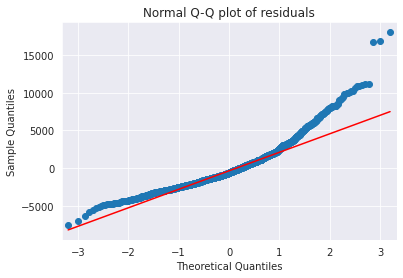

In [ ]:
import statsmodels.api as sm
qqplot1=sm.qqplot(tc_1_model3.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Text(0, 0.5, 'Standardized residual values')

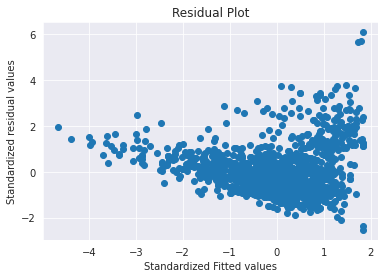

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(tc_1_model3.fittedvalues),
            get_standardized_values(tc_1_model3.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [ ]:
import statsmodels.formula.api as smf 
tc_1_model4 = smf.ols('price~hp',data=tc_1).fit()
tc_1_model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.098
Method:                 Least Squares   F-statistic:                     156.9
Date:                Thu, 23 Mar 2023   Prob (F-statistic):           3.12e-34
Time:                        05:23:06   Log-Likelihood:                -13715.
No. Observations:                1435   AIC:                         2.743e+04
Df Residuals:                    1433   BIC:                         2.745e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3041.1318    619.766      4.907      0.000    1825.386    4256.877
hp            75.6689      6.041     12.526      0.000      63.818      87.519
==============================================================================
Omnibus:                      447.247   Durbin-Watson:                   0.340
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1322.705
Skew:                           1.586   Prob(JB):                    6.00e-288
Kurtosis:                       6.473   Cond. No.                         703.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

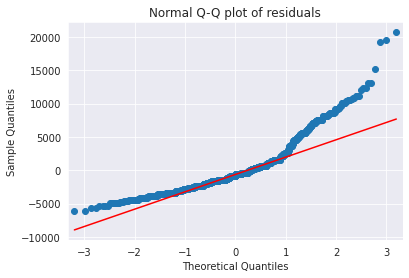

In [ ]:
import statsmodels.api as sm
qqplot1=sm.qqplot(tc_1_model4.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Text(0, 0.5, 'Standardized residual values')

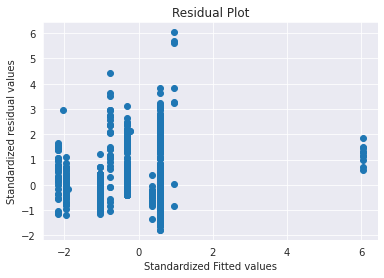

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(tc_1_model4.fittedvalues),
            get_standardized_values(tc_1_model4.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [ ]:
import statsmodels.formula.api as smf 
tc_1_model5 = smf.ols('price~weight',data=tc_1).fit()
tc_1_model5.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.332
Model:                            OLS   Adj. R-squared:                  0.331
Method:                 Least Squares   F-statistic:                     711.0
Date:                Thu, 23 Mar 2023   Prob (F-statistic):          1.55e-127
Time:                        05:23:07   Log-Likelihood:                -13501.
No. Observations:                1435   AIC:                         2.701e+04
Df Residuals:                    1433   BIC:                         2.702e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3.193e+04   1601.273    -19.938      0.000   -3.51e+04   -2.88e+04
weight        39.7719      1.492     26.665      0.000      36.846      42.698
==============================================================================
Omnibus:                      104.356   Durbin-Watson:                   0.558
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              513.888
Skew:                           0.046   Prob(JB):                    2.57e-112
Kurtosis:                       5.930   Cond. No.                     2.21e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.21e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

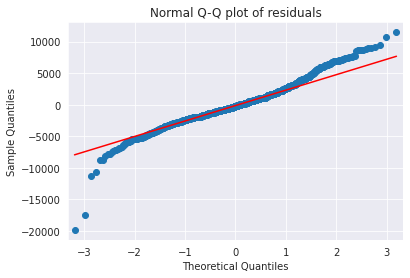

In [ ]:
import statsmodels.api as sm
qqplot1=sm.qqplot(tc_1_model5.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()


Text(0, 0.5, 'Standardized residual values')

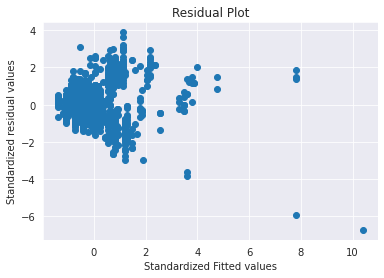

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(tc_1_model5.fittedvalues),
            get_standardized_values(tc_1_model5.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [ ]:
import statsmodels.formula.api as smf 
tc_1_model6 = smf.ols('price~age+km+weight+hp',data=tc_1).fit()
tc_1_model6.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.861
Model:                            OLS   Adj. R-squared:                  0.860
Method:                 Least Squares   F-statistic:                     2206.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:23:08   Log-Likelihood:                -12376.
No. Observations:                1435   AIC:                         2.476e+04
Df Residuals:                    1430   BIC:                         2.479e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -3858.7559    940.086     -4.105      0.000   -5702.852   -2014.660
age         -122.4705      2.622    -46.712      0.000    -127.613    -117.327
km            -0.0196      0.001    -16.217      0.000      -0.022      -0.017
weight        18.3840      0.807     22.776      0.000      16.801      19.967
hp            30.2027      2.538     11.901      0.000      25.224      35.181
==============================================================================
Omnibus:                      192.444   Durbin-Watson:                   1.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1462.386
Skew:                          -0.364   Prob(JB):                         0.00
Kurtosis:                       7.892   Cond. No.                     2.06e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.06e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Varience Inflation Factor

In [ ]:
aic_age=smf.ols('age~km+hp+cc+doors+gears+qtr_tax+weight',data=tc_1).fit().aic
rsq_age = smf.ols('age~km+hp+cc+doors+gears+qtr_tax+weight',data=tc_1).fit().rsquared  
vif_age = 1/(1-rsq_age)

aic_km=smf.ols('km~age+hp+cc+doors+gears+qtr_tax+weight',data=tc_1).fit().aic
rsq_km = smf.ols('km~age+hp+cc+doors+gears+qtr_tax+weight',data=tc_1).fit().rsquared  
vif_km = 1/(1-rsq_km) 

aic_hp=smf.ols('hp~age+km+cc+doors+gears+qtr_tax+weight',data=tc_1).fit().aic
rsq_hp = smf.ols('hp~age+km+cc+doors+gears+qtr_tax+weight',data=tc_1).fit().rsquared  
vif_hp = 1/(1-rsq_hp) 

aic_cc=smf.ols('cc~age+km+hp+doors+gears+qtr_tax+weight',data=tc_1).fit().aic
rsq_cc = smf.ols('cc~age+km+hp+doors+gears+qtr_tax+weight',data=tc_1).fit().rsquared  
vif_cc = 1/(1-rsq_cc)

aic_doors=smf.ols('doors~age+km+cc+hp+gears+qtr_tax+weight',data=tc_1).fit().aic
rsq_doors = smf.ols('doors~age+km+cc+hp+gears+qtr_tax+weight',data=tc_1).fit().rsquared  
vif_doors = 1/(1-rsq_doors)

aic_qtr_tax=smf.ols('qtr_tax~age+km+cc+doors+gears+hp+weight',data=tc_1).fit().aic
rsq_qtr_tax = smf.ols('qtr_tax~age+km+cc+doors+gears+hp+weight',data=tc_1).fit().rsquared  
vif_qtr_tax = 1/(1-rsq_qtr_tax)

aic_weight=smf.ols('weight~age+km+cc+doors+gears+qtr_tax+hp',data=tc_1).fit().aic
rsq_weight = smf.ols('weight~age+km+cc+doors+gears+qtr_tax+hp',data=tc_1).fit().rsquared  
vif_weight = 1/(1-rsq_weight)

# Storing vif values in a data frame
df = {'Variables':['age','km','hp','cc','doors','qtr_tax','weight'],
      'VIF':[vif_age,vif_km,vif_hp,vif_cc,vif_doors,vif_qtr_tax,vif_weight],
      'aic':[aic_age,aic_km,aic_hp,aic_cc,aic_doors,aic_qtr_tax,aic_weight],
      'r_sqr':[rsq_age,rsq_km,rsq_hp,rsq_cc,rsq_doors,rsq_qtr_tax,rsq_weight]}
Vif_tab = pd.DataFrame(df)  
Vif_tab

,Variables,VIF,aic,r_sqr
0,age,1.876236,11568.161431,0.467018
1,km,1.757178,33504.865129,0.430906
2,hp,1.419180,11353.533979,0.295368
3,cc,1.163470,21235.440839,0.140502
4,doors,1.155890,3740.296995,0.134866
5,qtr_tax,2.295375,13550.139079,0.564341
6,weight,2.487180,14133.791531,0.597938


Model Detection Diagnostics

In [ ]:
tc_1_model1 = smf.ols('price~age+km+hp+cc+doors+gears+qtr_tax+weight',data=tc_1).fit()
tc_1_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.863
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     1118.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:23:09   Log-Likelihood:                -12366.
No. Observations:                1435   AIC:                         2.475e+04
Df Residuals:                    1426   BIC:                         2.480e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -5472.5404   1412.169     -3.875      0.000   -8242.692   -2702.389
age         -121.7139      2.615    -46.552      0.000    -126.843    -116.585
km            -0.0207      0.001    -16.552      0.000      -0.023      -0.018
hp            31.5846      2.818     11.210      0.000      26.058      37.112
cc            -0.1186      0.090     -1.316      0.188      -0.295       0.058
doors         -0.9202     39.988     -0.023      0.982     -79.362      77.522
gears        597.7159    196.969      3.035      0.002     211.335     984.097
qtr_tax        3.8588      1.311      2.944      0.003       1.288       6.430
weight        16.8555      1.069     15.761      0.000      14.758      18.953
==============================================================================
Omnibus:                      149.666   Durbin-Watson:                   1.544
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1000.538
Skew:                          -0.204   Prob(JB):                    5.44e-218
Kurtosis:                       7.070   Cond. No.                     3.13e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.13e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot

model_influence = model.get_influence()
(c,_)=model_influence.cooks_distance

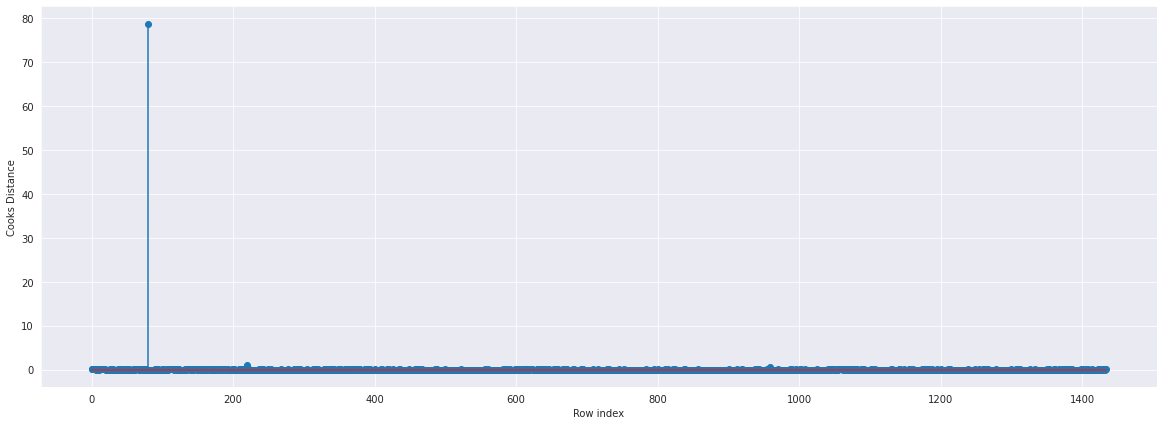

In [ ]:
#plot the influencers values using stem plot
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(tc_1)), np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
#index and value of influencer wher c is more than .5
(np.argmax(c),np.max(c))

(80, 78.72950582258932)

In [ ]:
n,k=tc_1.shape
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.020905923344947737

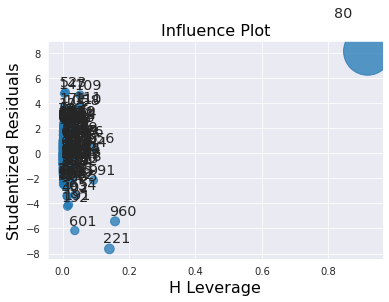

In [ ]:
#from seaborn.regression import statsmodels
#from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
import statsmodels.api as sm

#influence_plot(model1,alhpa=0.5)
sm.graphics.influence_plot(tc_1_model1)
plt.show()

In [ ]:
tc_1[tc_1.index.isin([80])]

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
80,18950,25,20019,110,16000,5,5,100,1180


In [ ]:
#Discard the data points which are influencers and reasign the row number (reset_index())
toyotocorolla_2=tc_1.drop(tc_1.index[[80]],axis=0).reset_index()
toyotocorolla_2=toyotocorolla_2.drop('index',axis=1)
toyotocorolla_2 
     

,price,age,km,hp,cc,doors,gears,qtr_tax,weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1429,7500,69,20544,86,1300,3,5,69,1025
1430,10845,72,19000,86,1300,3,5,69,1015
1431,8500,71,17016,86,1300,3,5,69,1015
1432,7250,70,16916,86,1300,3,5,69,1015


In [ ]:
while model.rsquared < 0.90:
    for c in [np.max(c)>0.5]:
        model= smf.ols('price~age+km+hp+cc+doors+gears+qtr_tax+weight',data=toyotocorolla_2).fit()
        (c,_)=model.get_influence().cooks_distance
        c
        np.argmax(c) , np.max(c)
        toyotocorolla_2=toyotocorolla_2.drop(toyotocorolla_2.index[[np.argmax(c)]],axis=0).reset_index(drop=True)
        toyotocorolla_2
    else:
        final_model=smf.ols('price~age+km+hp+cc+doors+gears+qtr_tax+weight',data=toyotocorolla_2).fit()
        final_model.rsquared , final_model.aic
        print("Thus model accuracy is improved to",final_model.rsquared)

Thus model accuracy is improved to 0.8765926307402282
Thus model accuracy is improved to 0.8839684606741538
Thus model accuracy is improved to 0.8882395145171204
Thus model accuracy is improved to 0.8902571486612915
Thus model accuracy is improved to 0.8909888960319987
Thus model accuracy is improved to 0.8922595280462808
Thus model accuracy is improved to 0.8933621011392295
Thus model accuracy is improved to 0.8947147371605556
Thus model accuracy is improved to 0.8955233405057648
Thus model accuracy is improved to 0.8930210061069088
Thus model accuracy is improved to 0.8939546425147169
Thus model accuracy is improved to 0.8954112430715817
Thus model accuracy is improved to 0.8960182592139027
Thus model accuracy is improved to 0.8968403506948497
Thus model accuracy is improved to 0.8964026771830705
Thus model accuracy is improved to 0.8958538146890626
Thus model accuracy is improved to 0.8953750500147553
Thus model accuracy is improved to 0.8949455651565242
Thus model accuracy is impro

In [ ]:
toyotocorolla_2.shape

(1330, 9)

In [ ]:
final_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.900
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     1492.
Date:                Thu, 23 Mar 2023   Prob (F-statistic):               0.00
Time:                        05:53:21   Log-Likelihood:                -11038.
No. Observations:                1330   AIC:                         2.209e+04
Df Residuals:                    1321   BIC:                         2.214e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.864e+04   1513.105    -12.316      0.000   -2.16e+04   -1.57e+04
age         -108.2573      2.181    -49.648      0.000    -112.535    -103.980
km            -0.0155      0.001    -14.830      0.000      -0.018      -0.013
hp             7.8533      3.037      2.586      0.010       1.895      13.812
cc            -2.2731      0.291     -7.799      0.000      -2.845      -1.701
doors       -149.1873     32.432     -4.600      0.000    -212.811     -85.563
gears        251.4363    163.559      1.537      0.124     -69.428     572.301
qtr_tax      -11.6187      1.626     -7.144      0.000     -14.809      -8.428
weight        36.9768      1.446     25.566      0.000      34.139      39.814
==============================================================================
Omnibus:                        5.509   Durbin-Watson:                   1.826
Prob(Omnibus):                  0.064   Jarque-Bera (JB):                5.515
Skew:                           0.158   Prob(JB):                       0.0635
Kurtosis:                       2.993   Cond. No.                     4.34e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.34e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

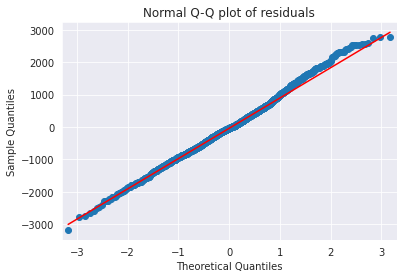

In [ ]:
import statsmodels.api as sm
qqplot1=sm.qqplot(final_model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

Text(0, 0.5, 'Standardized residual values')

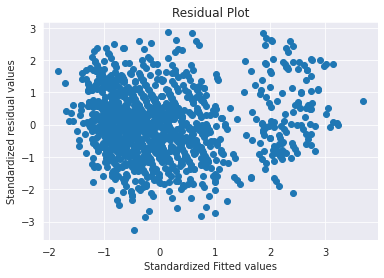

In [ ]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()
plt.scatter(get_standardized_values(final_model.fittedvalues),
            get_standardized_values(final_model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')

In [ ]:
final_model.rsquared,final_model.rsquared_adj

(0.9003762532318559, 0.8997729300114583)

In [ ]:
# test data for prediction is
test_data=pd.DataFrame({'age':12,'km':40000,'hp':80,'cc':1300,'doors':4,'gears':5,'qtr_tax':69,'weight':1012},index=[0])
test_data

,age,km,hp,cc,doors,gears,qtr_tax,weight
0,12,40000,80,1300,4,5,69,1012


In [ ]:
#mpredection of price
final_model.predict(test_data)

0    14398.815471
dtype: float64

In [ ]:
predicted_values = model.predict(tc_1)
tc_1["predicted_price"] = pd.Series(predicted_values)
tc_1["error"]=tc_1["price"]-tc_1["predicted_price"]
tc_1

,price,age,km,hp,cc,doors,gears,qtr_tax,weight,predicted_price,error
0,13500,23,46986,90,2000,3,5,210,1165,15729.432375,-2229.432375
1,13750,23,72937,90,2000,3,5,210,1165,15329.991147,-1579.991147
2,13950,24,41711,90,2000,3,5,210,1165,15702.428929,-1752.428929
3,14950,26,48000,90,2000,3,5,210,1165,15389.233919,-439.233919
4,13750,30,38500,90,2000,3,5,210,1170,15287.734792,-1537.734792
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025,9203.051136,-1703.051136
1432,10845,72,19000,86,1300,3,5,69,1015,8532.098968,2312.901032
1433,8500,71,17016,86,1300,3,5,69,1015,8670.833903,-170.833903
1434,7250,70,16916,86,1300,3,5,69,1015,8780.570061,-1530.570061


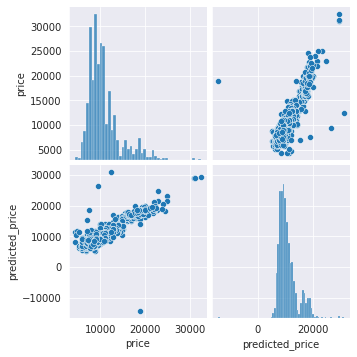

In [ ]:
sns.pairplot(tc_1[['price','predicted_price']])

Conclusion

In [ ]:
# comparing above models
test_data={'Model':pd.Series(['all linearModel Transformation','price~age','price~km',
                              'price~hp','price~weight','price~age+km+weight+hp+doors+gears','After Removing influceing points']),
     'R Squared':pd.Series([tc_1_model1.rsquared,tc_1_model2.rsquared,tc_1_model3.rsquared,
tc_1_model4.rsquared,tc_1_model5.rsquared,tc_1_model6.rsquared,final_model.rsquared]),
     'adjR Squared':pd.Series([tc_1_model1.rsquared_adj,tc_1_model2.rsquared_adj,tc_1_model3.rsquared_adj,
                            tc_1_model4.rsquared_adj,tc_1_model5.rsquared_adj,tc_1_model6.rsquared_adj,final_model.rsquared_adj])}
     
test_table=pd.DataFrame(test_data)
test_table
     

,Model,R Squared,adjR Squared
0,all linearModel Transformation,0.862520,0.861749
1,price~age,0.767855,0.767693
2,price~km,0.324239,0.323767
3,price~hp,0.098680,0.098051
4,price~weight,0.331626,0.331159
5,price~age+km+weight+hp+doors+gears,0.860551,0.860161
6,After Removing influceing points,0.900376,0.899773


The final model is giving best accuracy among all the predicition profit i.e 90%